In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,LSTM
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, Dropout, Dense,LSTM

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import os

import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Convert the file from drive to colab local speed up**

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Patato leaf Orginal data/Potato dataset Zip copy.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()


In [5]:
!pip install GPUTil

#importing liberaries

import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import GPUtil
import pathlib
import os
import time
import cv2
from keras.preprocessing import image
import matplotlib.pyplot as plot
from keras.preprocessing.image import img_to_array
from tabulate import tabulate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from numpy import argmax
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split

#"C:\Users\USER\OneDrive\Desktop\Leaf project\Leaf\Potato dataset - Copy"

Image_size = (256,256)
directory_root = "/content/dataset/Potato dataset Zip copy"

default_image_size = tuple((256, 256))

files = os.listdir(directory_root)
print(files)

#creating image list containing all Dataset images as directories
image_dir_list = []
label_list = []
print("Checking the the root directory for images,...")
root_dir = os.listdir(directory_root)
for plant_disease_folder in root_dir:
    plant_disease_dir = os.listdir(f"{directory_root}/{plant_disease_folder}")
    for image in plant_disease_dir:
        plant_image_dir = f"{directory_root}/{plant_disease_folder}/{image}"
        if plant_image_dir.endswith(".jpg") == True or plant_image_dir.endswith(".JPG") == True:
            image_dir_list.append(plant_image_dir)
            label_list.append(plant_disease_folder)


#Containing all images in a list
images_list= []
for image_dir in image_dir_list:
    if image_dir.endswith(".jpg") == True or image_dir.endswith(".JPG") == True:
        image = cv2.imread(image_dir)
        image = cv2.resize(image, default_image_size)
        image_array = img_to_array(image)
        images_list.append(image_array)


#Converting images to numpy array with normalization
np_image_list = np.array(images_list, dtype=np.float16) / 255.0
print(np_image_list.shape)

#binarizing labels
df= pd.DataFrame(label_list)
df=df.rename(columns={0:'count'})
df['count']=df['count'].map({'Potato___Late_blight':0,'Potato___Early_blight':1,'Potato_Healthy':2})
image_labels=np.array(df)

#label_binarizer = LabelBinarizer()
#image_labels = label_binarizer.fit_transform(label_list)
#n_classes = len(label_binarizer.classes_)
#print(n_classes)

X = np_image_list
y = image_labels

#Importing the KFold module from sklearn for evaluation
from sklearn.model_selection import KFold

k =10

kf = KFold(n_splits=k, random_state=True, shuffle=True)


for train_index, test_index in kf.split(X) :
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test, = y[train_index], y[test_index]

['Potato___Late_blight', 'Potato_Healthy', 'Potato___Early_blight']
Checking the the root directory for images,...
(3000, 256, 256, 3)


In [12]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, train_size=0.8, test_size=0.2,random_state=None, shuffle=True)

In [13]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
print("x_val:",x_val.shape)
print("y_val:",y_val.shape)

x_train: (1728, 256, 256, 3)
y_train: (1728, 1)
x_test: (300, 256, 256, 3)
y_test: (300, 1)
x_val: (432, 256, 256, 3)
y_val: (432, 1)


**Datagen**

In [14]:
#4 dIMENTION ( For Use Datagen)
x_train = np.array(x_train).reshape(1728,256,256, 3)
x_test = np.array(x_test).reshape(300,256,256, 3)
x_val = np.array(x_val).reshape(432,256,256, 3)

In [15]:
datagen = ImageDataGenerator(
       featurewise_center=False,
       samplewise_center=False,
       featurewise_std_normalization=False,
       samplewise_std_normalization=False,
       zca_whitening=False,
       rotation_range = 90,
       zoom_range = 0.5,
       width_shift_range=0.2,
       height_shift_range=0.2,
       horizontal_flip = True,
)
datagen.fit(x_train)
datagen.fit(x_val)
datagen.fit(x_test)

**Reshape for model**

In [16]:
x_train = np.array(x_train).reshape(1728,1,256,256, 3)
x_test = np.array(x_test).reshape(300,1,256,256, 3)
x_val = np.array(x_val).reshape(432,1,256,256, 3)

In [17]:
y_train=np.array(y_train).reshape(1728)
y_test=np.array(y_test).reshape(300)
y_val=np.array(y_val).reshape(432)

In [18]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
print("x_val:",x_val.shape)
print("y_val:",y_val.shape)

x_train: (1728, 1, 256, 256, 3)
y_train: (1728,)
x_test: (300, 1, 256, 256, 3)
y_test: (300,)
x_val: (432, 1, 256, 256, 3)
y_val: (432,)


In [19]:
# instantiate model
model = Sequential()

# add three time-distributed convolutional layers for feature extraction
model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu'),input_shape=(1,256,256,3)))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(1, 1))))

model.add(TimeDistributed(Conv2D(128, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(128, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(256, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(256, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

# extract features and dropout
model.add(TimeDistributed(Flatten()))
model.add(Dropout(0.5))

# input to LSTM
model.add(LSTM(256, return_sequences=False, dropout=0.5))

# classifier with sigmoid activation for multilabel
model.add(Dense(3, activation='sigmoid'))

# compile the model with binary_crossentropy loss for multilabel
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

# look at the params before training
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 254, 254, 64)   1792      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 253, 253, 64)   0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 251, 251, 128   73856     
 stributed)                  )                                   
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 125, 125, 128   0         
 stributed)                  )                                   
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 123, 123, 128   1

In [20]:
#opt = Adam(lr=0.01)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
history = model.fit(x_train,y_train,epochs =3,validation_data = (x_val, y_val),shuffle=True,batch_size=32)

Epoch 1/3
54/54 [==============================] - 46s 503ms/step - loss: 0.5884 - accuracy: 0.7378 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 2/3
54/54 [==============================] - 22s 399ms/step - loss: 0.3009 - accuracy: 0.8970 - val_loss: 0.0581 - val_accuracy: 0.9931
Epoch 3/3
54/54 [==============================] - 21s 398ms/step - loss: 0.0186 - accuracy: 0.9983 - val_loss: 0.0108 - val_accuracy: 1.0000


In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

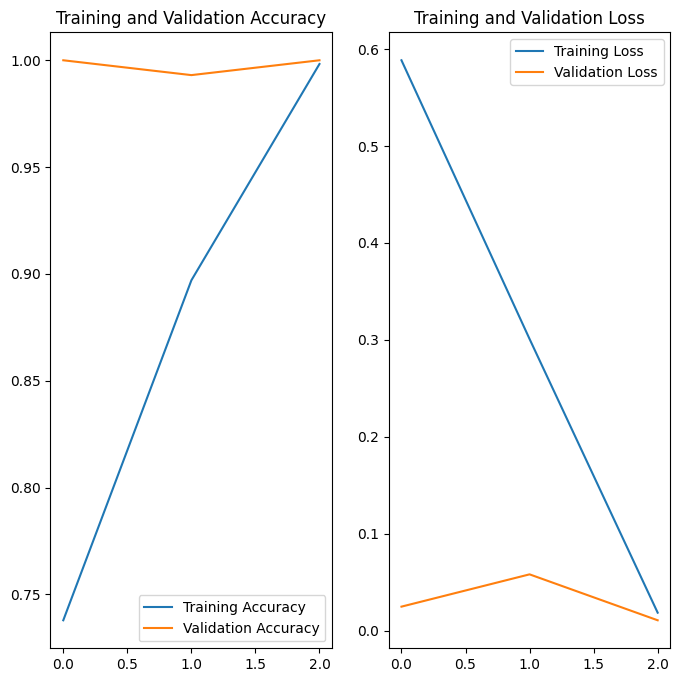

In [23]:
# Accuracy AND loss Graph
EPOCHS=3
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
scores = model.evaluate(x_test)

10/10 [==============================] - 1s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [25]:
from sklearn.metrics import classification_report

In [26]:
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(x_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

AttributeError: ignored

In [1]:
pred_y1 = model.predict(x_test)
print("Normal accuracy: ", accuracy_score(y_test, pred_y1))
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_y1))
print('--------------------------------------------------------')
print("")

NameError: ignored